# Logistic Regression
  - $y = 0$ or $1$
    - $h_{θ}(x)$ can be $> 1$ or $< 0$
  - Logistic Regression: $0 <= h_{θ}(x) <= 1$

## Logistic Regression Model
  - Want $0 <= h_{θ}(x) <= 1$
  - $h_{θ}(x) = g(θ^Tx)$
   - $z = θ^T$
   - $g(z) = \frac{1}{1 + e^{-z}}$
- $g(x)$ là sigmod() function (logistic function)
- $P(y=0|x,θ) + P(y = 1|x,θ) = 1$


## Decision Boundary
 - $h_{θ}(x) = g(θ_0 + θ_1x_1 + θ_2x_2)$
 - Predict $y = 1$ if $-3 +x_1+x_2 >= 0$
 - => $x_1 + x_2 = 3$

## Non-linear decision boundaries
  - $h_{θ}(x) = g(θ_0 + θ_1x_1 + θ_2x_2 + θ_3x_3^2 + θ_4x_4^2)$
  - Predict $y = 1$ if $-1 + x_1^2 + x_2^2 >= 0 $
  - $x_1^2 + x_2^2 >= 1$

### Cost function
  - Training set: {$(x^{(1)}y^{(1)}, x^{(2)}y^{(2)},..., x^{(m)}y^{(m)})$}

  - m examples $x$ = m x 1, $y$ thuộc {0, 1}

  - $$h_{θ}(x) = \frac{1}{1 + e^{-θ^Tx}}$$

  - Cost function
    - Logistic regression: $$J(θ) = \frac{1}{m} ∑ \frac{1}{2}(h_θ(x^{(i)}-y^{(i)})^2$$
  
    - $$Cost(h_{θ}(x^{(i)}),y^{(i)}) = \frac{1}{2}(h_{θ}(x^{(i)}) - y^{(i)})^2$$

- $Cost(h_θ(x), y) = - log(h_θ(x)) $ if $y = 1$
- $Cost(h_θ(x), y) = - log(1 - h_θ(x)) $ if $y = 0$

- Đạo hàm sigmod function
  - $$\frac{∂g(x)}{∂x} = g(x)*(1-g(x))$$

- Đạo hàm Cost function
  - $$\frac{∂J}{∂θ_j} = -\frac{1}{m}∑((y^i - h_θ(x^i))x_j^i$$

## Addressing overfitting

  - Options:
    1. Reduce number of features
      - Manually select which features to keep
      - Model selection algorithm (next in course)
    2. Regularization

## Optimization algorithm
  - Gradient Descent (basic)
  - Conjugate gradient
  - BFGS
  - L-BFGS
- Ưu điểm:
  - No need to manually pick α (learning rate)
  - Often faster than Gradient descent
- Nhược điểm:
  - More complex

## Regularization
  - $J(θ) = \frac{1}{2m}[∑(h_θ(x^i) - y^i + λ∑θ^2_j]$
    - Chọn lamda vừa phải



## Logistic Regression

Predict Pass/Fail using Logistic Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/week 1/Problem4.txt', header=None)

df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
X = df.iloc[:, :-1].values

y = df.iloc[:, -1].values

In [ ]:
positive = (y==1)
negative = (y==0)

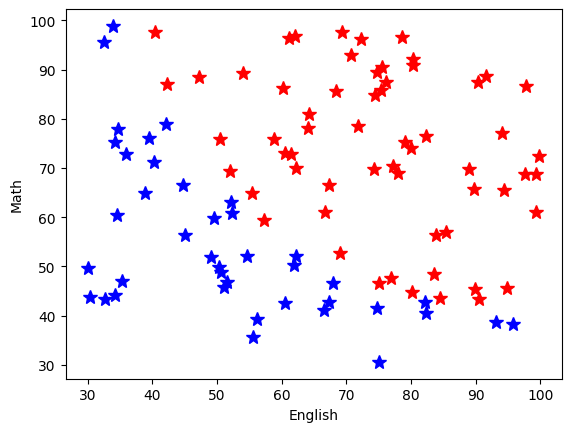

In [ ]:
#Draw biểu đồ
plt.plot(X[positive, 0], X[positive, 1], 'r*', lw=2, ms=10)
plt.plot(X[negative, 0], X[negative, 1], 'b*', lw=2, ms=10)
plt.xlabel('English')
plt.ylabel('Math')
plt.show()

In [ ]:
#define hàm sigmoid
def compute_sigmoid_value(z):
  return 1 / (1 + np.exp(-np.array(z)))

In [ ]:
#Compute the cost function J base on theta
def compute_cost_value(theta, X, y):
  m = y.size
  z = X.dot(theta.T)
  h = compute_sigmoid_value(z)
  J = (1/m)*np.sum(-y.dot(np.log(h)) - (1-y).dot(np.log(1-h)))
  grad = (1/m)*(h-y).dot(X)
  return J, grad

In [ ]:
m, n = X.shape # 100 2

In [ ]:
X = np.concatenate([np.ones((m,1)), X], axis=1)

In [ ]:
test_theta = np.zeros(n+1)
cost, grad = compute_cost_value(test_theta, X, y)
print('Cost value: ', cost)
print('gradient value: ',grad)

Cost value:  0.6931471805599453
gradient value:  [ -0.1        -12.00921659 -11.26284221]


### Train the logistic regression

In [ ]:
from scipy import optimize

In [ ]:
result = optimize.minimize(compute_cost_value, test_theta, (X, y), jac=True, method='TNC', options={'maxiter':3000})

<ipython-input-102-48f7fbb5d991>:1: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  result = optimize.minimize(compute_cost_value, test_theta, (X, y), jac=True, method='TNC', options={'maxiter':3000})


In [ ]:
print(result.fun)
print(result.x)

0.20349770158947478
[-25.16131857   0.20623159   0.20147149]


In [ ]:
#predict Pass or Fail
def predict_Pass_or_Fail(theta, X):
  z = X.dot(theta.T)
  return np.round(compute_sigmoid_value(z))

### Predict the results of a random student: english = 40, math = 80

In [ ]:
#test
X_test = np.array([1, 40, 80])
print(predict_Pass_or_Fail(result.x, X_test))

0.0


In [ ]:
probability = predict_Pass_or_Fail(result.x, X)
print('the accuracy = ', np.mean(probability==y)*100)

the accuracy =  89.0


## Apply logistic regression and regularization to predict a device status

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/week 1/Problem5.txt', delimiter=',', header=None)

df.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
m,n = X.shape

In [ ]:
positive = (y==1).reshape(m,1)
negative = (y==0).reshape(m,1)

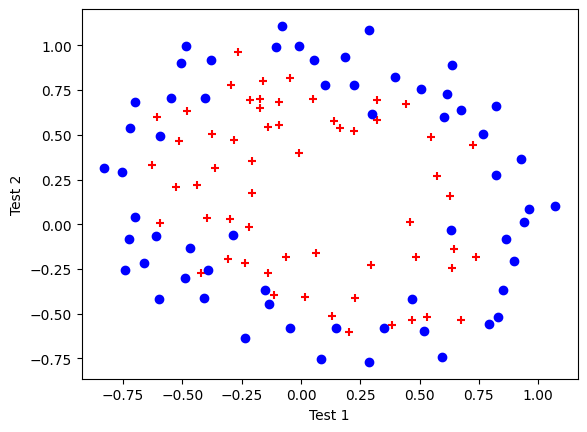

In [ ]:
plt.scatter(X[positive[:,0],0], X[positive[:,0],1], c='r', marker='+')
plt.scatter(X[negative[:,0],0], X[negative[:,0],1], c='b', marker='o')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.show()

In [ ]:
#Define a fuction to increate the number of feature
def increate_Input_Features(X1, X2, degree=3):
  if X1.ndim > 0:
    out = [np.ones(X1.shape[0])]
  else:
    out = [np.ones(1)]

  for i in range(1, degree+1):
    for j in range(i+1):
      out.append((X1**(i-j)) * (X2**j))

  if X1.ndim > 0:
    return np.stack(out, axis=1)
  else:
    return np.array(out)

In [ ]:
X_train = increate_Input_Features(X[:,0], X[:,1])

In [155]:
# Compute the cost function with lamda regularization
def compute_Cost_Value_With_Lambda(theta, X, y, customLambda=0):
  m = y.size
  z = X.dot(theta.T)
  h = compute_sigmoid_value(z)
  # Homework: Assigment add Lambda to the cost function
  temp = theta
  temp[0] = 0
  J = (1/m) * np.sum(-y.dot(np.log(h)) - (1-y).dot(np.log(1-h))) + (customLambda / (2*m)) * np.sum(np.square(temp))
  grad = (1/m)*(h-y).dot(X)
  grad = grad + (customLambda/m) * temp
  return J, grad

## Use the logistic regression with Sklearn library

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/week 1/Bank_Data.csv')

df.head()

,AGE,HOME,INCOME,GENDER,HOUSEHOLD_N,CREDIT_LINES_N,DEAFULTED
0,23,R,2,M,3,2,1
1,43,R,3,F,2,2,1
2,63,R,7,M,3,3,0
3,46,H,7,F,4,4,0
4,55,H,7,F,3,4,0


In [ ]:
X = df.iloc[:, [0,2,4,5]].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0
 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1
 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0
 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[99 32]
 [28 61]]


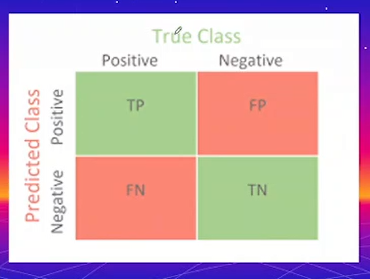